エピソード:1
0.2304609725704375
迷路を解くのにかかったステップ数は606です
[[0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2

TypeError: unsupported operand type(s) for %: 'list' and 'int'

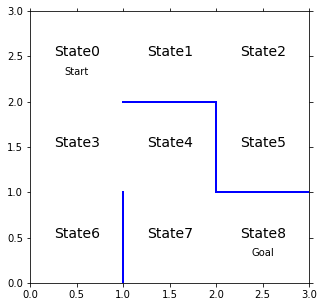

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plt.plot([1, 1], [0, 1], color='blue', linewidth=2)
plt.plot([1, 2], [2, 2], color='blue', linewidth=2)
plt.plot([2, 2], [2, 1], color='blue', linewidth=2)
plt.plot([2, 3], [1, 1], color='blue', linewidth=2)

plt.text(0.5, 2.5, 'State0', size=14, ha='center')
plt.text(1.5, 2.5, 'State1', size=14, ha='center')
plt.text(2.5, 2.5, 'State2', size=14, ha='center')
plt.text(0.5, 1.5, 'State3', size=14, ha='center')
plt.text(1.5, 1.5, 'State4', size=14, ha='center')
plt.text(2.5, 1.5, 'State5', size=14, ha='center')
plt.text(0.5, 0.5, 'State6', size=14, ha='center')
plt.text(1.5, 0.5, 'State7', size=14, ha='center')
plt.text(2.5, 0.5, 'State8', size=14, ha='center')
plt.text(0.5, 2.3, 'Start', ha='center')
plt.text(2.5, 0.3, 'Goal', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

theta_0 = np.array([[np.nan, 1, 1, np.nan],  # 0
                    [np.nan, 1, np.nan, 1],  # 1
                    [np.nan, np.nan, 1, 1],  # 2
                    [1, 1, 1, np.nan],  # 3
                    [np.nan, np.nan, 1, 1],  # 4
                    [1, np.nan, np.nan, np.nan],  # 5
                    [1, np.nan, np.nan, np.nan],  # 6
                    [1, 1, np.nan, np.nan],  # 7
                    ])

def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape  
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  
    pi = np.nan_to_num(pi) 
    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)

pi_0

[a, b] = theta_0.shape  
Q = np.random.rand(a, b) * theta_0 * 0.1

def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]

    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]

    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action

def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]  

    if next_direction == "up":
        s_next = s - 3  
    elif next_direction == "right":
        s_next = s + 1  
    elif next_direction == "down":
        s_next = s + 3  
    elif next_direction == "left":
        s_next = s - 1 

    return s_next

def Q_learning(s, a, r, s_next, Q, eta, gamma):

    if s_next == 8:  
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])

    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next,: ]) - Q[s, a])

    return Q

def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0  
    a = a_next = get_action(s, Q, epsilon, pi)  
    s_a_history = [[0, np.nan]]  

    while (1):  
        a = a_next  

        s_a_history[-1][1] = a

        s_next = get_s_next(s, a, Q, epsilon, pi)

        s_a_history.append([s_next, np.nan])
 
        if s_next == 8:
            r = 1  
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)

        Q = Q_learning(s, a, r, s_next, Q, eta, gamma)

        if s_next == 8: 
            break
        else:
            s = s_next

    return [s_a_history, Q]

from matplotlib import animation
from IPython.display import HTML


def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    state = s_a_history[i]  
    x = (state % 3) + 0.5  
    y = 2.5 - int(state / 3) 
    line.set_data(x, y)
    return (line,)

eta = 0.1  
gamma = 0.9 
epsilon = 0.5 
v = np.nanmax(Q, axis=1)  
is_continue = True
episode = 1

V = []  
V.append(np.nanmax(Q, axis=1)) 

s_a_all = []

while is_continue: 
    print("エピソード:" + str(episode))

    epsilon = epsilon / 2

    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis=1)  
    print(np.sum(np.abs(new_v - v)))  
    v = new_v
    V.append(v) 

    for i in s_a_history:
        s_a_all.append(i)

    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")
    print(s_a_history)

    episode = episode + 1
    if episode > 1:
        break

#print(s_a_history)        
#anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(all), interval=200, repeat=False)
#HTML(anim.to_jshtml())